In [3]:
# import the required libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import tensorflow_datasets as tfds
ds = tf.keras.datasets.mnist.load_data()
# Display some benchmark statistics
tfds.benchmark(ds, batch_size=32)
# Second iteration is much faster, due to auto-caching
tfds.benchmark(ds, batch_size=32)


************ Summary ************



  0%|          | 0/2 [00:00<?, ?it/s]

Examples/sec (First included) 1327.63 ex/sec (total: 96 ex, 0.07 sec)
Examples/sec (First only) 442.56 ex/sec (total: 32 ex, 0.07 sec)
Examples/sec (First excluded) 19801980.20 ex/sec (total: 64 ex, 0.00 sec)

************ Summary ************



  0%|          | 0/2 [00:00<?, ?it/s]

Examples/sec (First included) 3594.08 ex/sec (total: 96 ex, 0.03 sec)
Examples/sec (First only) 1198.30 ex/sec (total: 32 ex, 0.03 sec)
Examples/sec (First excluded) 10554089.71 ex/sec (total: 64 ex, 0.00 sec)


,duration,num_examples,avg
first+lasts,0.026711,96,3.594077e+03
first,0.026705,32,1.198298e+03
lasts,0.000006,64,1.055409e+07


In [5]:
# pre-processing the dataset for tf
(x_train, y_train), (x_test, y_test) = ds


In [6]:
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [7]:
# buiding the model
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# compiling and training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 31ms/step - accuracy: 0.8957 - loss: 0.3309 - val_accuracy: 0.9816 - val_loss: 0.0605
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9851 - loss: 0.0503 - val_accuracy: 0.9878 - val_loss: 0.0391
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9891 - loss: 0.0335 - val_accuracy: 0.9884 - val_loss: 0.0365
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9907 - loss: 0.0280 - val_accuracy: 0.9897 - val_loss: 0.0341
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9858 - val_loss: 0.0503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9944 - loss: 0.0169 - val_accuracy: 0.9882 - val_loss: 0.0399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9908 - val_loss: 0.0347
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9961 -

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 7ms/step - accuracy: 0.9891 - loss: 0.0443

Test accuracy: 0.9890999794006348


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 415,520 (1.59 MB)

 Trainable params: 138,506 (541.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 277,014 (1.06 MB)

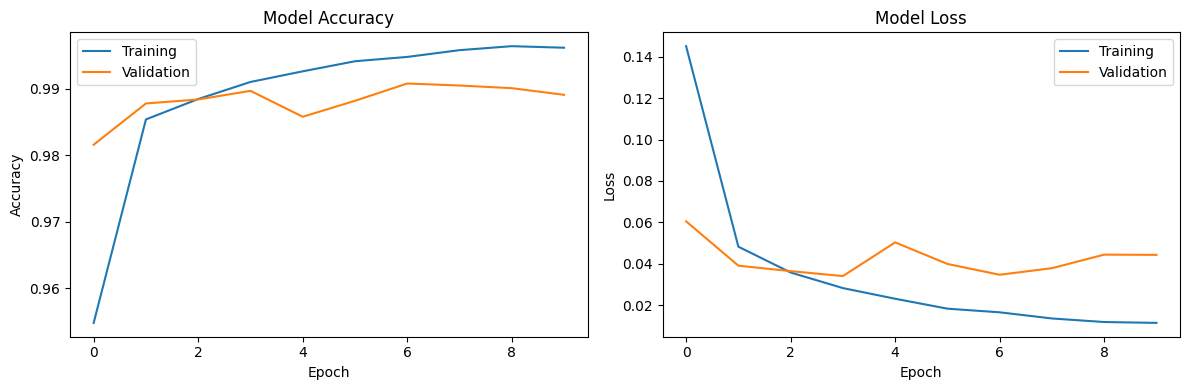

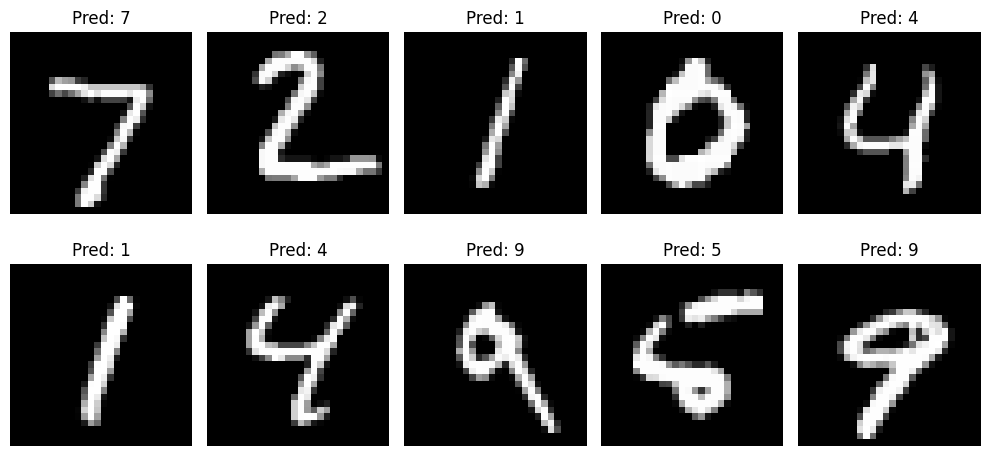

In [12]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Display sample predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    pred = model.predict(x_test[i:i+1], verbose=0)
    plt.title(f'Pred: {np.argmax(pred)}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
model.save('/content/model.keras')